In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load Image

In [45]:
def read_file(filename):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    return img

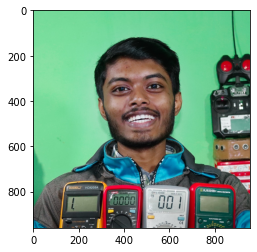

In [46]:
filename = 'Shantonu.jpg'
img = read_file(filename)

# Create Edge Mask

In [47]:
def edge_mask(img, line_size, blur_value):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray_blur = cv2.medianBlur(gray, blur_value)


    edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)
    return edges

<function matplotlib.pyplot.show(close=None, block=None)>

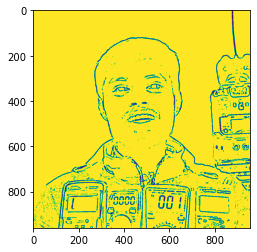

In [48]:
line_size, blur_value = 7,7
edges = edge_mask(img, line_size, blur_value)

plt.imshow(edges)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

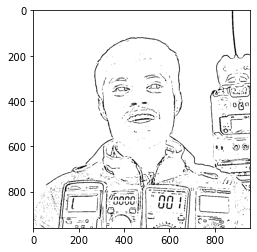

In [49]:
line_size, blur_value = 7,7
edges = edge_mask(img, line_size, blur_value)

plt.imshow(edges, cmap='gray')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

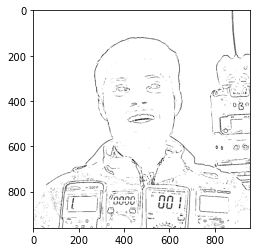

In [50]:
line_size, blur_value = 5,7
edges = edge_mask(img, line_size, blur_value)

plt.imshow(edges, cmap='gray')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

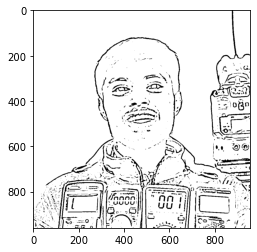

In [51]:
line_size, blur_value = 9,7
edges = edge_mask(img, line_size, blur_value)

plt.imshow(edges, cmap='gray')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

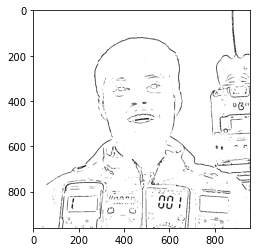

In [52]:
line_size, blur_value = 7,9
edges = edge_mask(img, line_size, blur_value)

plt.imshow(edges, cmap='gray')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

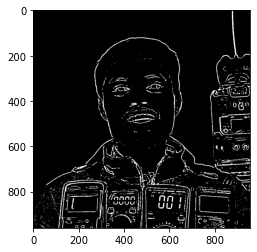

In [53]:
line_size, blur_value = 7,7
edges = edge_mask(img, line_size, blur_value)

plt.imshow(edges, cmap='binary')
plt.show

# Reduce The Color Palette

In [54]:
def color_quantization(img, k):

    # Transform The Image
    data = np.float32(img).reshape((-1,3))

    # Determine Criteria
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)

    # Implementint K-Means
    ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)


    result = center[label.flatten()]
    result = result.reshape(img.shape)
    return result

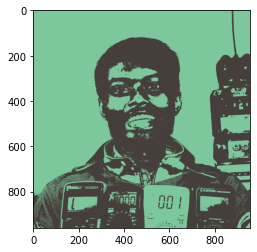

In [55]:
img = color_quantization(img, k = 2)
plt.imshow(img)
plt.show()

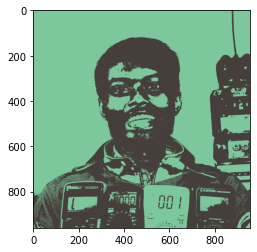

In [56]:
img = color_quantization(img, k = 3)
plt.imshow(img)
plt.show()

# Reduce The Noise

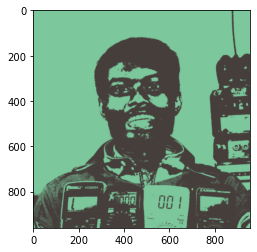

In [57]:
blurred = cv2.bilateralFilter(img, d = 7, sigmaColor= 200, sigmaSpace= 200)
plt.imshow(blurred)
plt.show()

# Combine Edge Mask With The Quantiz Img

In [58]:
def cartoon():
    c = cv2.bitwise_and(blurred, blurred, mask= edges)
    plt.imshow(c)
    plt.show()

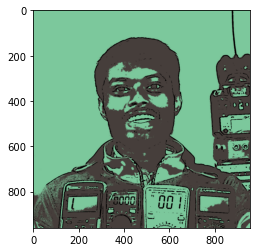

In [59]:
cartoon()

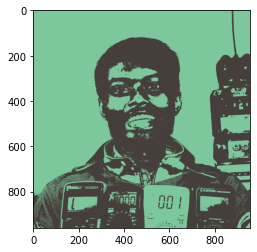

In [60]:
img = color_quantization(img, k = 9)
plt.imshow(img)
plt.show()

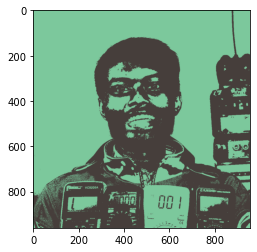

In [61]:
blurred = cv2.bilateralFilter(img, d = 3, sigmaColor= 200, sigmaSpace= 200)
plt.imshow(blurred)
plt.show()

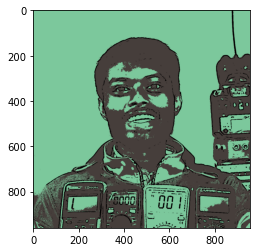

In [62]:
cartoon()